In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import LFI_galactic_center as LFIgc
from astropy import units as u

0.3702541451408002
0.2159689751694328
0.0034930485889878475
0.0021062236569739123
0.001478387541194891
0.0010996296102895014
0.0008528659807493517
0.0006889618079676002
0.0006312581486191654
0.0004817814545986678


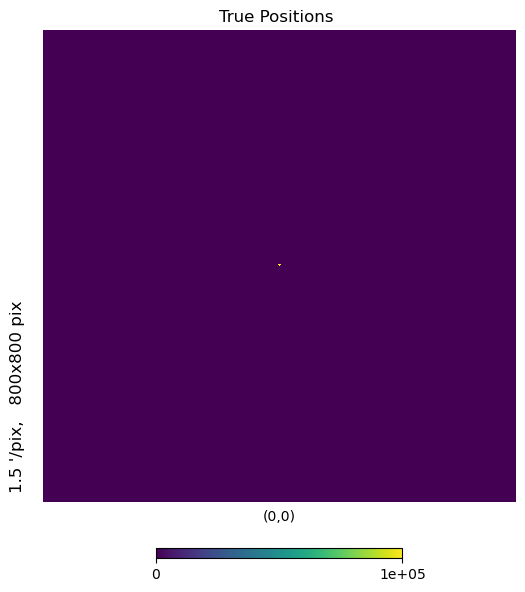

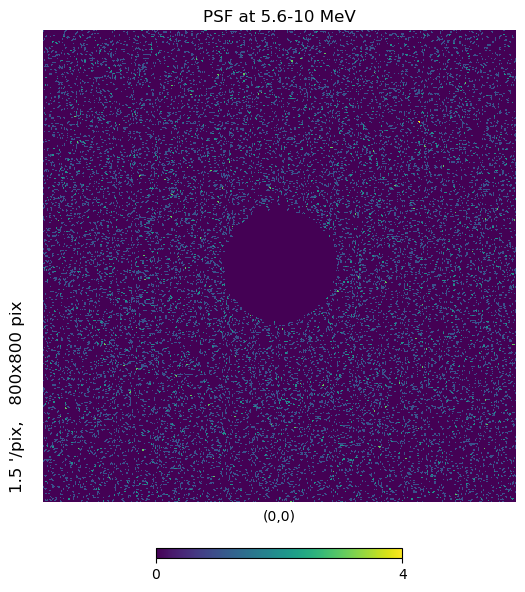

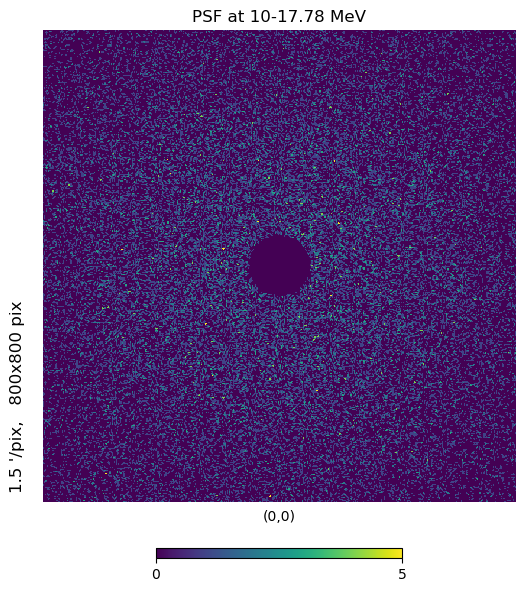

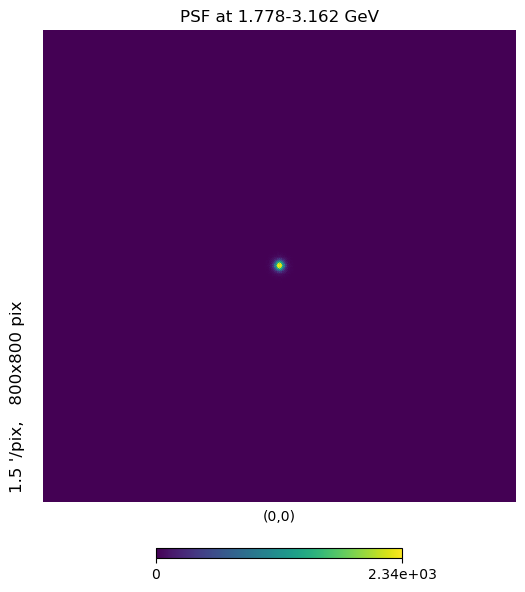

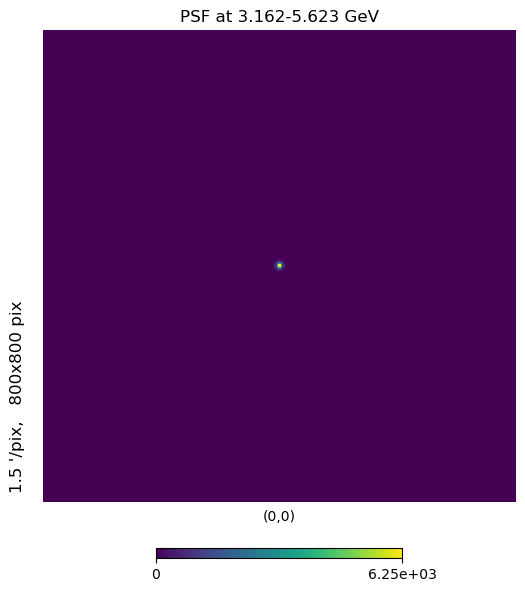

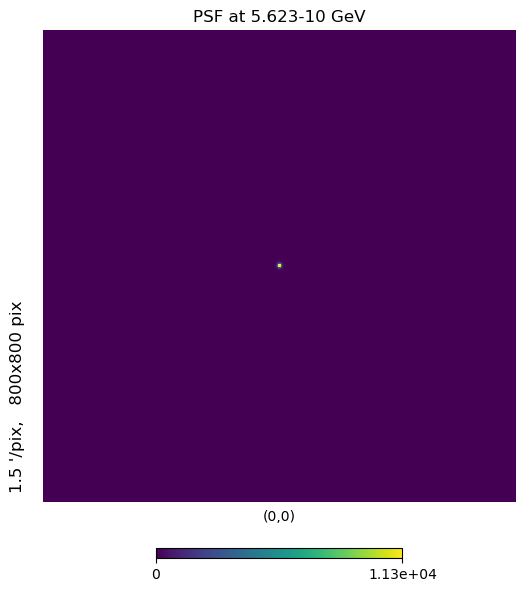

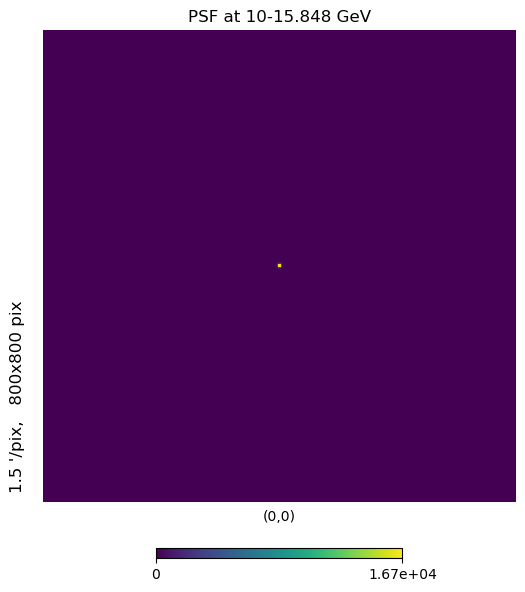

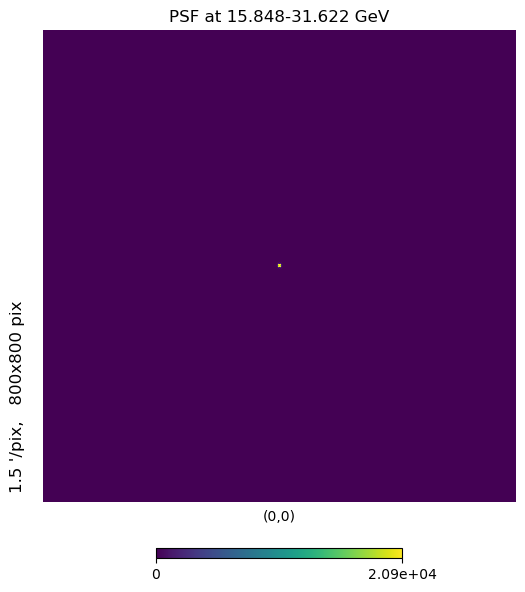

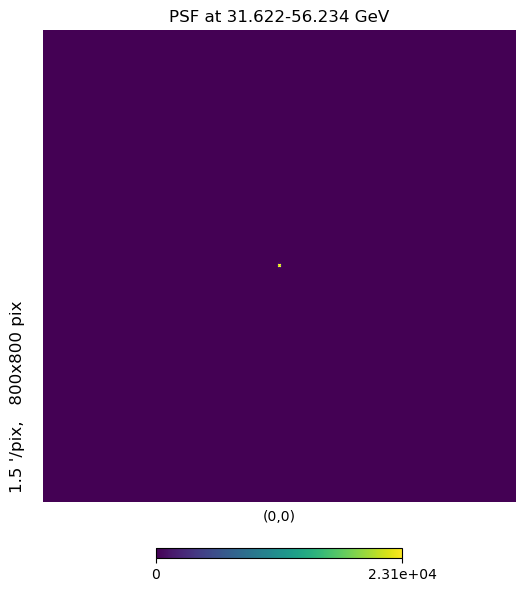

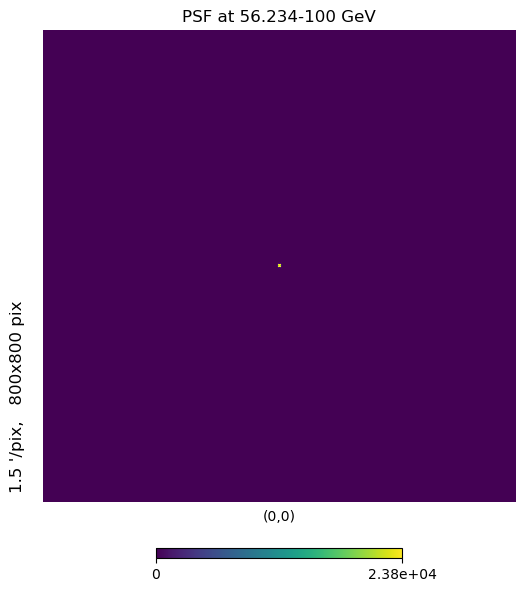

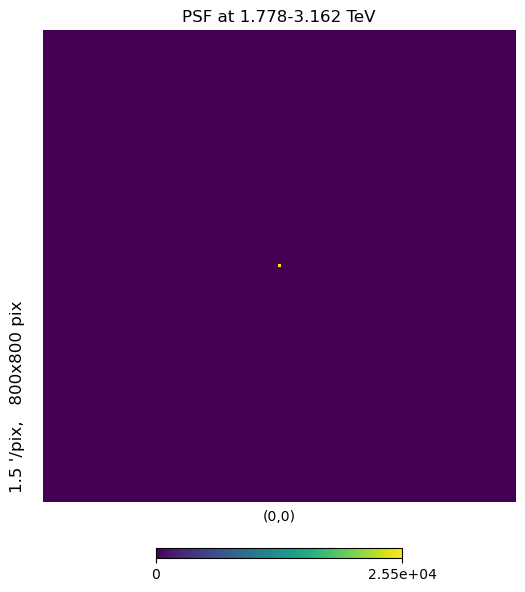

In [2]:
angular_cut = 10*u.deg.to('rad') #degrees
E_bins = ['5.6-10 MeV', '10-17.78 MeV', '1.778-3.162 GeV', '3.162-5.623 GeV', '5.623-10 GeV', '10-15.848 GeV', '15.848-31.622 GeV', '31.622-56.234 GeV', '56.234-100 GeV', '1.778-3.162 TeV']
Es = [7, 15, 2000, 4000, 7000, 12000, 20000, 40000, 70000, 2000000]
N_side = 64*16
N_pix = 12*N_side**2
for Ei in range(len(E_bins)):
    photon_info = {'energies': Es[Ei]*np.ones(100000), 'angles': np.pi/2*np.ones((100000,2))}
    photon_info['angles'][:,1] *= 0
    heatmap = np.histogram(hp.ang2pix(N_side, photon_info['angles'][:,0], photon_info['angles'][:,1]), bins = N_pix, range = [0.0, N_pix])
    if Ei == 0:
        hp.gnomview(heatmap[0], title = f'True Positions ', xsize = int(round(2*angular_cut*u.rad.to('arcmin')/1.5)), reso = 1.5)
    my_LFI = LFIgc.LFI_G([],[],[[0],[1]],[0,1],[0,1],1,1,1)
    obs_info = {'psf_fits_path': '../../paper2/paper2_data/Fermi_files/psf_P8R3_ULTRACLEANVETO_V2_PSF.fits', 'event_type': 'PSF3'}
    photon_info = my_LFI.apply_PSF(photon_info, obs_info)
    heatmap = np.histogram(hp.ang2pix(N_side, photon_info['angles'][:,0], photon_info['angles'][:,1]), bins = N_pix, range = [0.0, N_pix])
    hp.gnomview(heatmap[0], title = f'PSF at ' + E_bins[Ei], xsize = int(round(2*angular_cut*u.rad.to('arcmin')/1.5)), reso = 1.5)

(array([2.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 5.000e+00, 6.000e+00, 1.000e+00, 6.000e+00, 7.000e+00,
        4.000e+00, 7.000e+00, 7.000e+00, 1.100e+01, 1.200e+01, 1.500e+01,
        2.000e+01, 2.300e+01, 1.800e+01, 3.100e+01, 2.400e+01, 3.300e+01,
        3.500e+01, 4.000e+01, 4.400e+01, 5.100e+01, 6.000e+01, 5.600e+01,
        8.500e+01, 8.900e+01, 1.040e+02, 1.200e+02, 1.060e+02, 1.520e+02,
        1.670e+02, 1.760e+02, 2.040e+02, 2.120e+02, 2.920e+02, 2.950e+02,
        3.310e+02, 4.160e+02, 4.460e+02, 5.440e+02, 6.150e+02, 6.290e+02,
        8.280e+02, 7.770e+02, 1.090e+03, 1.182e+03, 1.328e+03, 1.700e+03,
        1.830e+03, 2.562e+03, 2.999e+03, 3.181e+03, 4.317e+03, 4.427e+03,
        5.760e+03, 6.729e+03, 6.436e+03, 8.180e+03, 7.617e+03, 8.122e+03,
        7.110e+03, 5.024e+03, 4.160e+03, 2.483e+03, 1.871e+03, 1.314e+03,
        7.550e+02, 6.780e+02, 4.620e+02, 3.660e+02, 2.780e+02, 1.870e+02,
        1.780e+02, 1.090e+02, 1.160e+0

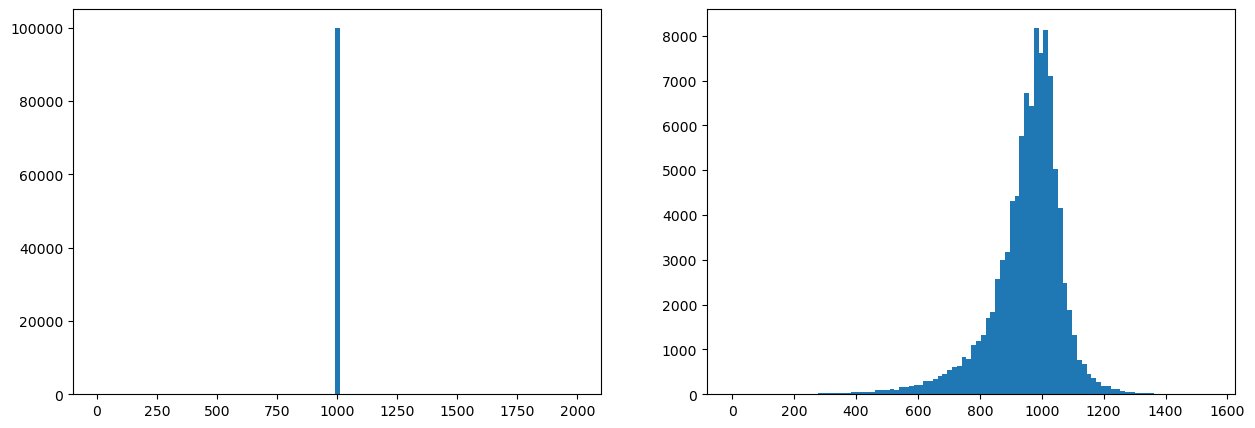

In [8]:
hist1, bins1 = np.histogram(photon_info['energies'], bins = np.linspace(0, 2*np.max(photon_info['energies']), 100))
obs_info = {'edisp_fits_path': '../../paper2/paper2_data/Fermi_files/edisp_P8R3_ULTRACLEANVETO_V2_PSF.fits', 'event_type': 'PSF3'}
photon_info = my_LFI.apply_energy_dispersion(photon_info, obs_info)
hist2, bins2 = np.histogram(photon_info['energies'], bins = 100)

fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].hist(bins1[:-1], bins1, weights=hist1)
ax[1].hist(bins2[:-1], bins2, weights=hist2)
#ax[1].set_yscale('log')